In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error , mean_absolute_error
import math
from statsmodels.tsa.stattools import adfuller

In [4]:
!pip install pmdarima

     -------------------------------------- 572.0/572.0 kB 1.9 MB/s eta 0:00:00


In [6]:
from pmdarima.arima import auto_arima

In [30]:
dateparse = lambda dates: pd.datetime.strptime(dates,'%Y-%m-%d')
df=pd.read_csv("stock_data.csv",sep=',',index_col="Date",parse_dates=['Date'],date_parser=dateparse).fillna(0)
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_2988\1151919857.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates,'%Y-%m-%d')


,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,No. of Shares,No. of Trades,Change(%)
Date,,,,,,,,,,
2015-01-01,0,438.988831,441.812073,437.676270,439.781311,417.988892,1367720.0,181432,9740,-0.0036
2015-01-02,1,439.880371,443.818054,437.998199,438.617340,416.882599,3383424.0,260835,19270,-0.0026
2015-01-05,2,438.344940,441.267212,432.946106,433.812897,412.316284,4662967.0,328788,39864,-0.0110
2015-01-06,3,430.915344,432.401276,412.093750,414.124512,393.603546,8596809.0,975422,26226,-0.0454
2015-01-07,4,414.619812,425.367950,414.570282,423.139069,402.171295,9562421.0,660342,24450,0.0218
...,...,...,...,...,...,...,...,...,...,...
2023-01-24,1989,2440.000000,2443.649902,2387.350098,2415.949951,2415.949951,7609558.0,349349,15122,-0.0059
2023-01-25,1990,2412.449951,2414.699951,2380.000000,2382.550049,2382.550049,5715684.0,103914,14987,-0.0138
2023-01-27,1991,2384.399902,2387.350098,2311.649902,2337.350098,2337.350098,11920991.0,452582,59632,-0.0190


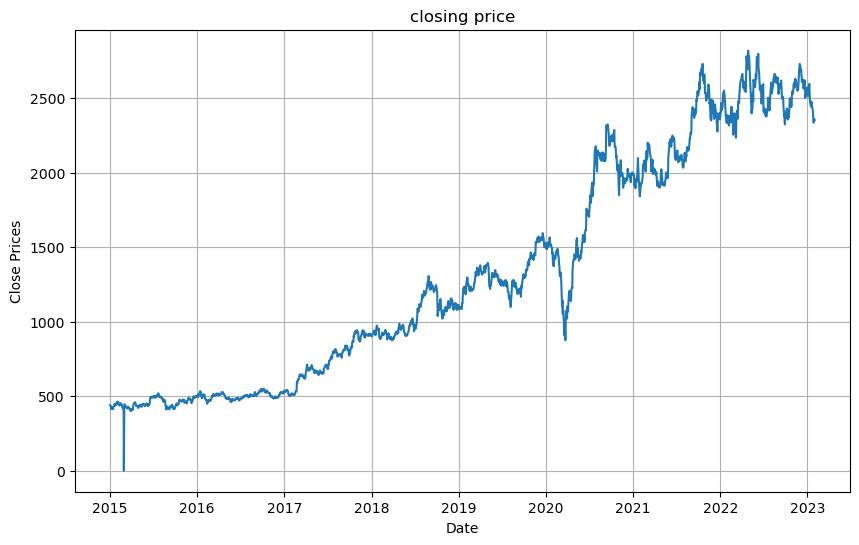

In [31]:
#plot close price

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel("Close Prices")
plt.plot(df['Close'])
plt.title('closing price')
plt.show()

<AxesSubplot:ylabel='Density'>

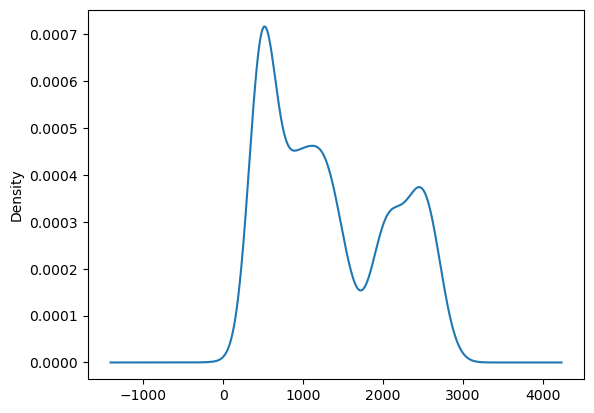

In [32]:
df_close=df['Close']
df_close.plot(kind='kde')

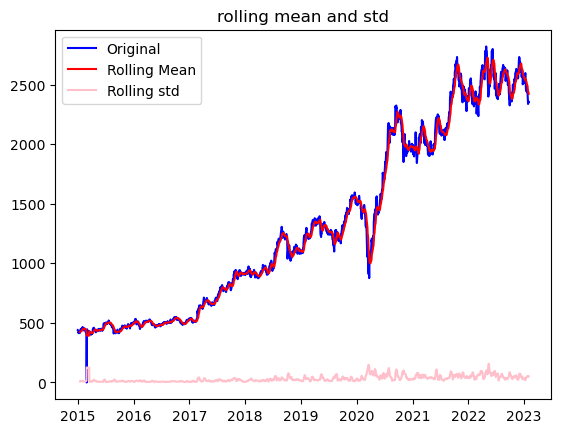

Results of dickey fuller test
Test Statistics               -0.684499
p-value                        0.850724
No. of lags used               1.000000
No. of observations used    1992.000000
critical value (1%)           -3.433637
critical value (5%)           -2.862992
critical value (10%)          -2.567543
dtype: float64


In [33]:
#augmented dickey fuller test

def test_stationarity(timeseries):
    #determing roling statistics
    rolmean=timeseries.rolling(12).mean()
    rolstd=timeseries.rolling(12).std()
    #plot rolling statistics
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red',label='Rolling Mean')
    plt.plot(rolstd, color='pink',label='Rolling std')
    plt.legend(loc='best')
    plt.title('rolling mean and std')
    plt.show()
    print('Results of dickey fuller test')
    adft = adfuller(timeseries,autolag='AIC')
    
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','No. of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)' %key] = values
    print(output)
test_stationarity(df_close)
    

In [37]:
#decompose the Time series

result = seasonal_decompose(df_close, model="multiplicative", freq = 30)
fig=plt.figure()
fig=result.plot()
fig.set_size_inches(16,9)

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

In [41]:
#eliminate trend
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


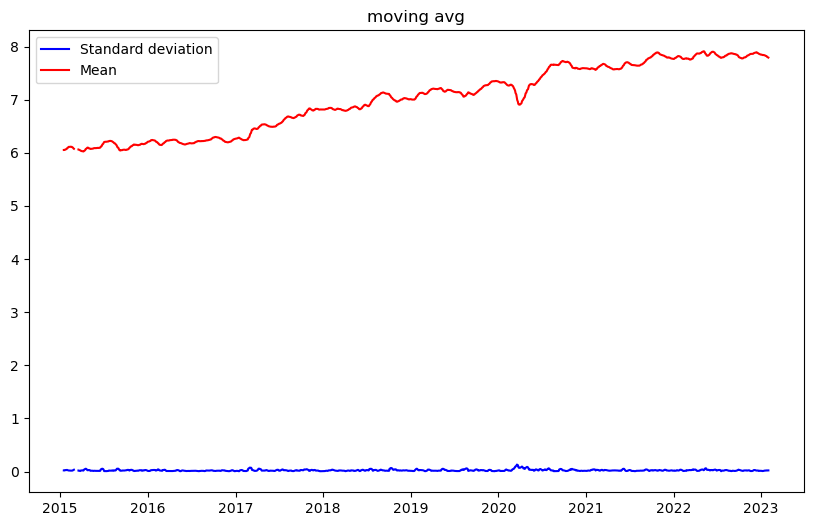

In [43]:
rcParams['figure.figsize']=10,6
df_log=np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('moving avg')
plt.plot(std_dev, color='blue', label='Standard deviation')
plt.plot(moving_avg, color='red', label='Mean')
plt.legend()
plt.show()

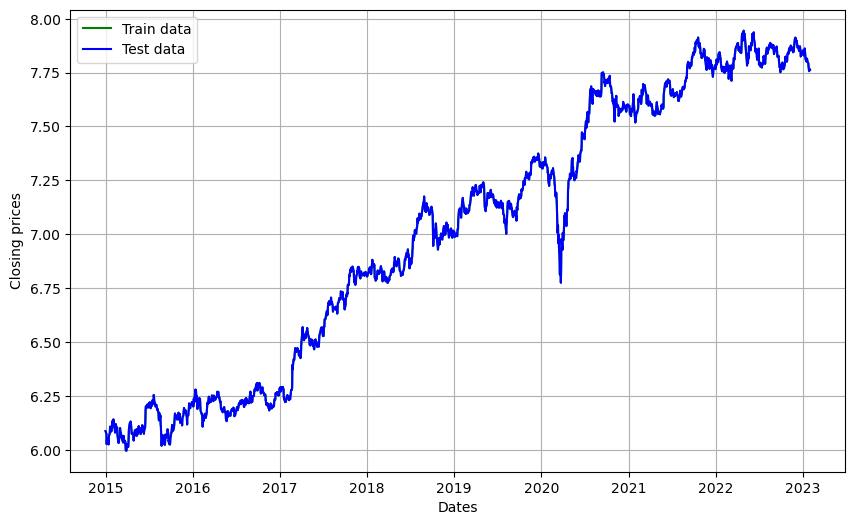

In [54]:
#train and test 
train_data, test_data=df_log[3:int(len(df_log)*0.9)],df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(df_log, 'blue', label='Test data')
plt.legend()